<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [ ]:
!pip3 install -U -q scikit-learn joblib seaborn colorama tld plotly whois wordcloud gensim nltk tldextract hmmlearn xgboost lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

In [ ]:
import re
import string
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from tldextract import extract as tld_extract
from tld import get_tld, is_tld
from tld.exceptions import TldDomainNotFound, TldBadUrl, TldIOError

from colorama import Fore
from datetime import datetime
from plotly.subplots import make_subplots
from plotly import graph_objects as go
from wordcloud import WordCloud
from gensim.models import Word2Vec
import tldextract
import hashlib
import whois
import warnings

warnings.filterwarnings("ignore")


In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).zip to kaggle (1).zip


{'kaggle (1).zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xe1|\x81Wh\x98"\xe1H\x00\x00\x00J\x00\x00\x00\x12\x00\x00\x00kaggle/kaggle.json\xabV*-N-\xcaK\xccMU\xb2R*\xce\xc8,K\xcc\x05\x91\x19\x89E\xa9\x86\x96\x96\x16J:J\xd9\xa9\x95@)\x03S3\xcb\x14c\xcb\xa4d\xd3d\x03\x8b\x14\xe34\x83D\xa3\xa4\x94\xb4T\x03\xd3T\x8bd\xb3\xa4\x14C\xa5Z\x00PK\x01\x02\x14\x00\x14\x00\x00\x00\x08\x00\xe1|\x81Wh\x98"\xe1H\x00\x00\x00J\x00\x00\x00\x12\x00\x00\x00\x00\x00\x00\x00\x01\x00 \x00\x00\x00\x00\x00\x00\x00kaggle/kaggle.jsonPK\x05\x06\x00\x00\x00\x00\x01\x00\x01\x00@\x00\x00\x00x\x00\x00\x00\x00\x00'}

In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d siddharthkumar25/malicious-and-benign-urls

Dataset URL: https://www.kaggle.com/datasets/siddharthkumar25/malicious-and-benign-urls
License(s): unknown
100% 8.82M/8.82M [00:00<00:00, 32.4MB/s]
100% 8.82M/8.82M [00:00<00:00, 31.3MB/s]


In [ ]:
!unzip malicious-and-benign-urls.zip

Archive:  malicious-and-benign-urls.zip
  inflating: urldata.csv             


In [ ]:
! ls

'kaggle (1).zip'   malicious-and-benign-urls.zip   sample_data	 urldata.csv


In [ ]:
urls_data = pd.read_csv('urldata.csv')
urls_data.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [ ]:
new_df = urls_data[['url', 'label']].copy()

# Rename columns
new_df.columns = ['url', 'type']

In [ ]:
new_df = new_df[new_df['type'] == 'benign']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
urls_data = pd.read_csv('/content/drive/My Drive/final_phish.csv')
urls_data.head()

,url,type
0,http://www.jackhatfield.co.uk/index.php?option...,defacement
1,http://soothingpainrelief.com/index.php?option...,defacement
2,http://anvari.co/index.php?option=com_content&...,defacement
3,http://www.civelo.no/design/index.html,defacement
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign


In [ ]:
urls_data = pd.concat([urls_data, new_df], axis=0)


<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>DATA PREPROCESSING AND EDA</b></h2>
</div>

In [ ]:
urls_data.head()

,url,type
0,http://www.jackhatfield.co.uk/index.php?option...,defacement
1,http://soothingpainrelief.com/index.php?option...,defacement
2,http://anvari.co/index.php?option=com_content&...,defacement
3,http://www.civelo.no/design/index.html,defacement
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign


In [ ]:
urls_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489871 entries, 0 to 345737
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     489871 non-null  object
 1   type    489871 non-null  object
dtypes: object(2)
memory usage: 11.2+ MB


In [ ]:
# combined_df.info()

In [ ]:
# file_path = "/content/combined_data.csv"

# # Save the DataFrame to a CSV file
# combined_df.to_csv(file_path, index=False)

In [ ]:
urls_data.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
import plotly.graph_objects as go

count = urls_data['type'].value_counts()
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors))])
fig.update_layout(
    xaxis_title='Types',
    yaxis_title='Count',
    title='Count of Different Types of URLs',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black', size=18),  # Set font color to black and size to 18
    xaxis=dict(
        linecolor='black',  # Set x-axis line color to black
        tickfont=dict(color='black', size=16)  # Set x-axis tick font color to black and size to 16
    ),
    yaxis=dict(
        linecolor='black',  # Set y-axis line color to black
        tickfont=dict(color='black', size=16)  # Set y-axis tick font color to black and size to 16
    )
)

fig.show()


In [ ]:
urls_data['url'] = urls_data['url'].replace('www.', '', regex=True)
urls_data.head()

,url,type
0,http://jackhatfield.co.uk/index.php?option=com...,defacement
1,http://soothingpainrelief.com/index.php?option...,defacement
2,http://anvari.co/index.php?option=com_content&...,defacement
3,http://civelo.no/design/index.html,defacement
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign


In [ ]:
urls_data["type"].value_counts()

type
benign        381916
defacement     95308
phishing        9956
malware         2691
Name: count, dtype: int64

In [ ]:
urls_data["url_type"] = urls_data["type"].replace({
    'benign':0,
    'defacement':1,
    'phishing':2,
    'malware':3
});

In [ ]:
urls_data.head()

,url,type,url_type
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1
1,http://soothingpainrelief.com/index.php?option...,defacement,1
2,http://anvari.co/index.php?option=com_content&...,defacement,1
3,http://civelo.no/design/index.html,defacement,1
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0


URL Length

In [ ]:
def get_url_length(url):
    # Remove common prefixes
    prefixes = ['http://', 'https://']
    for prefix in prefixes:
        if url.startswith(prefix):
            url = url[len(prefix):]

    # Remove 'www.' if present
    url = url.replace('www.', '')

    # Return the length of the remaining URL
    return len(url)

In [ ]:
urls_data['url_len'] = urls_data['url'].apply(lambda x: get_url_length(str(x)))

In [ ]:
urls_data.head()

,url,type,url_type,url_len
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,104
1,http://soothingpainrelief.com/index.php?option...,defacement,1,60
2,http://anvari.co/index.php?option=com_content&...,defacement,1,59
3,http://civelo.no/design/index.html,defacement,1,27
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,128


Domain Name

In [ ]:
def extract_pri_domain(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [ ]:
urls_data['pri_domain'] = urls_data['url'].apply(lambda x: extract_pri_domain(x))

In [ ]:
urls_data.head()

,url,type,url_type,url_len,pri_domain
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,104,jackhatfield.co.uk
1,http://soothingpainrelief.com/index.php?option...,defacement,1,60,soothingpainrelief.com
2,http://anvari.co/index.php?option=com_content&...,defacement,1,59,anvari.co
3,http://civelo.no/design/index.html,defacement,1,27,civelo.no
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,128,torcache.net


Count letters, digits, special char

In [ ]:
def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits

def count_special_chars(url):
    special_chars = set(string.punctuation)
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

In [ ]:
urls_data['letters_count']        = urls_data['url'].apply(lambda x: count_letters(x))
urls_data['digits_count']         = urls_data['url'].apply(lambda x: count_digits(x))
urls_data['special_chars_count']  = urls_data['url'].apply(lambda x: count_special_chars(x))

In [ ]:
urls_data.head()

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,104,jackhatfield.co.uk,80,10,21
1,http://soothingpainrelief.com/index.php?option...,defacement,1,60,soothingpainrelief.com,56,0,11
2,http://anvari.co/index.php?option=com_content&...,defacement,1,59,anvari.co,49,4,13
3,http://civelo.no/design/index.html,defacement,1,27,civelo.no,27,0,7
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,128,torcache.net,80,37,18


URL Shortening Services

In [ ]:
def has_shortening_service(url):
    pattern = re.compile(r'https?://(?:www\.)?(?:\w+\.)*(\w+)\.\w+')
    match = pattern.search(url)

    if match:
        domain = match.group(1)
        common_shortening_services = ['bit', 'goo', 'tinyurl', 'ow', 't', 'is',
                                      'cli', 'yfrog', 'migre', 'ff', 'url4', 'twit',
                                      'su', 'snipurl', 'short', 'BudURL', 'ping',
                                      'post', 'Just', 'bkite', 'snipr', 'fic',
                                      'loopt', 'doiop', 'short', 'kl', 'wp',
                                      'rubyurl', 'om', 'to', 'bit', 't', 'lnkd',
                                      'db', 'qr', 'adf', 'goo', 'bitly', 'cur',
                                      'tinyurl', 'ow', 'bit', 'ity', 'q', 'is',
                                      'po', 'bc', 'twitthis', 'u', 'j', 'buzurl',
                                      'cutt', 'u', 'yourls', 'x', 'prettylinkpro',
                                      'scrnch', 'filoops', 'vzturl', 'qr', '1url',
                                      'tweez', 'v', 'tr', 'link', 'zip']

        if domain.lower() in common_shortening_services:
            return 1
    return 0

In [ ]:
urls_data['shortened']  = urls_data['url'].apply(lambda x: has_shortening_service(x))

In [ ]:
urls_data.head()

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count,shortened
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,104,jackhatfield.co.uk,80,10,21,0
1,http://soothingpainrelief.com/index.php?option...,defacement,1,60,soothingpainrelief.com,56,0,11,0
2,http://anvari.co/index.php?option=com_content&...,defacement,1,59,anvari.co,49,4,13,0
3,http://civelo.no/design/index.html,defacement,1,27,civelo.no,27,0,7,0
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,128,torcache.net,80,37,18,0


In [ ]:
def abnormal_url(url):
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc
    if netloc:
        netloc = str(netloc)
        match = re.search(netloc, url)
        if match:
            return 1
    return 0

In [ ]:
urls_data['abnormal_url']  = urls_data['url'].apply(lambda x: abnormal_url(x))

In [ ]:
urls_data.head()

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,104,jackhatfield.co.uk,80,10,21,0,1
1,http://soothingpainrelief.com/index.php?option...,defacement,1,60,soothingpainrelief.com,56,0,11,0,1
2,http://anvari.co/index.php?option=com_content&...,defacement,1,59,anvari.co,49,4,13,0,1
3,http://civelo.no/design/index.html,defacement,1,27,civelo.no,27,0,7,0,1
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,128,torcache.net,80,37,18,0,1


Check for https (SECURE)

In [ ]:
def secure_http(url):
    return int(urlparse(url).scheme == 'https')

In [ ]:
urls_data['secure_http']  = urls_data['url'].apply(lambda x: secure_http(x))

In [ ]:
urls_data.head()

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,104,jackhatfield.co.uk,80,10,21,0,1,0
1,http://soothingpainrelief.com/index.php?option...,defacement,1,60,soothingpainrelief.com,56,0,11,0,1,0
2,http://anvari.co/index.php?option=com_content&...,defacement,1,59,anvari.co,49,4,13,0,1,0
3,http://civelo.no/design/index.html,defacement,1,27,civelo.no,27,0,7,0,1,0
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,128,torcache.net,80,37,18,0,1,0


Hostname = IP Adress??

In [ ]:
import ipaddress
def have_ip_address(url):
    try:
        parsed_url = urlparse(url)
        if parsed_url.hostname:
            ip = ipaddress.ip_address(parsed_url.hostname)
            return isinstance(ip, (ipaddress.IPv4Address, ipaddress.IPv6Address))
    except ValueError:
        pass  # Invalid hostname or IP address

    return 0

In [ ]:
urls_data['have_ip']  = urls_data['url'].apply(lambda x: have_ip_address(x))

In [ ]:
urls_data.head()

,url,type,url_type,url_len,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,104,jackhatfield.co.uk,80,10,21,0,1,0,0
1,http://soothingpainrelief.com/index.php?option...,defacement,1,60,soothingpainrelief.com,56,0,11,0,1,0,0
2,http://anvari.co/index.php?option=com_content&...,defacement,1,59,anvari.co,49,4,13,0,1,0,0
3,http://civelo.no/design/index.html,defacement,1,27,civelo.no,27,0,7,0,1,0,0
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,128,torcache.net,80,37,18,0,1,0,0


In [ ]:
urls_data.isnull().sum()

url                      0
type                     0
url_type                 0
url_len                  0
pri_domain             204
letters_count            0
digits_count             0
special_chars_count      0
shortened                0
abnormal_url             0
secure_http              0
have_ip                  0
dtype: int64

In [ ]:
urls_data.fillna(0,inplace=True)

In [ ]:
urls_data.isnull().sum()

url                    0
type                   0
url_type               0
url_len                0
pri_domain             0
letters_count          0
digits_count           0
special_chars_count    0
shortened              0
abnormal_url           0
secure_http            0
have_ip                0
dtype: int64

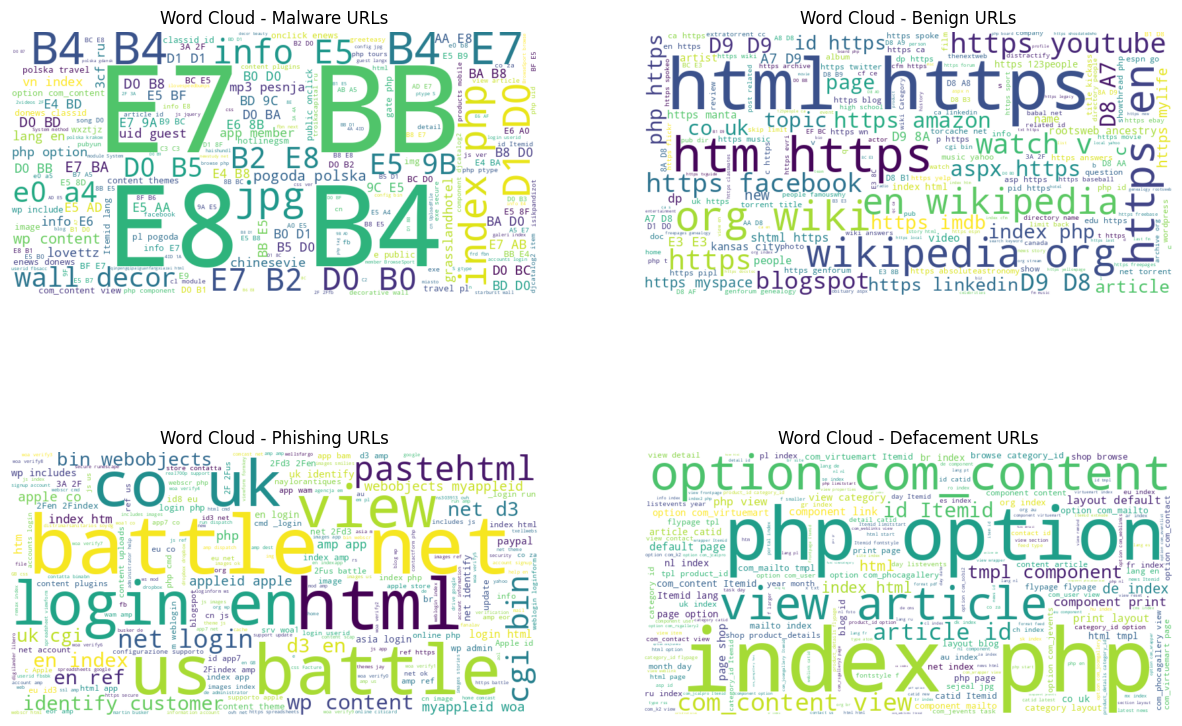

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate URLs based on types
malware_urls = ' '.join(urls_data[urls_data['type'] == 'malware']['url'])
benign_urls = ' '.join(urls_data[urls_data['type'] == 'benign']['url'])
phishing_urls = ' '.join(urls_data[urls_data['type'] == 'phishing']['url'])
defacement_urls = ' '.join(urls_data[urls_data['type'] == 'defacement']['url'])

# Create WordCloud for each type
wordcloud_malware = WordCloud(width=800, height=400, background_color='white').generate(malware_urls)
wordcloud_benign = WordCloud(width=800, height=400, background_color='white').generate(benign_urls)
wordcloud_phishing = WordCloud(width=800, height=400, background_color='white').generate(phishing_urls)
wordcloud_defacement = WordCloud(width=800, height=400, background_color='white').generate(defacement_urls)

# Plot the WordClouds
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_malware, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Malware URLs')

plt.subplot(2, 2, 2)
plt.imshow(wordcloud_benign, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Benign URLs')

plt.subplot(2, 2, 3)
plt.imshow(wordcloud_phishing, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Phishing URLs')

plt.subplot(2, 2, 4)
plt.imshow(wordcloud_defacement, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Defacement URLs')

plt.show()


In [ ]:
# Histogram
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Histogram(x=urls_data['url_len'], nbinsx=100))

fig.update_layout(
    title='Distribution of URL Lengths',
    xaxis_title='URL Length',
    yaxis_title='Count',
    template='plotly_dark',
    font=dict(color='white')
)

fig.show()

In [ ]:
counts = urls_data[['letters_count', 'digits_count', 'special_chars_count']].sum()

fig = go.Figure(data=[
    go.Bar(name='Letters', x=['Count'], y=[counts['letters_count']]),
    go.Bar(name='Digits', x=['Count'], y=[counts['digits_count']]),
    go.Bar(name='Special Characters', x=['Count'], y=[counts['special_chars_count']])
])

fig.update_layout(title='Counts of Letters, Digits, and Special Characters',
                  xaxis_title='Type',
                  yaxis_title='Count',
                  barmode='group',
                  template='plotly_dark',
                  font=dict(color='white'))

fig.show()

In [ ]:
true_color = 'green'

false_color = 'red'

shortened_counts = urls_data['shortened'].value_counts()
colors = [true_color if val else false_color for val in shortened_counts.index]
fig_shortened = go.Figure(data=go.Bar(x=shortened_counts.index, y=shortened_counts, marker_color=colors))
fig_shortened.update_layout(title='Counts of shortened',
                            xaxis_title='Value',
                            yaxis_title='Count',
                            template='plotly_dark',
                            font=dict(color='white'))
fig_shortened.show()

abnormal_url_counts = urls_data['abnormal_url'].value_counts()
colors = [true_color if val else false_color for val in abnormal_url_counts.index]
fig_abnormal_url = go.Figure(data=go.Bar(x=abnormal_url_counts.index, y=abnormal_url_counts, marker_color=colors))
fig_abnormal_url.update_layout(title='Counts of abnormal_url',
                               xaxis_title='Value',
                               yaxis_title='Count',
                               template='plotly_dark',
                               font=dict(color='white'))
fig_abnormal_url.show()

secure_http_counts = urls_data['secure_http'].value_counts()
colors = [true_color if val else false_color for val in secure_http_counts.index]
fig_secure_http = go.Figure(data=go.Bar(x=secure_http_counts.index, y=secure_http_counts, marker_color=colors))
fig_secure_http.update_layout(title='Counts of secure_http',
                              xaxis_title='Value',
                              yaxis_title='Count',
                              template='plotly_dark',
                              font=dict(color='white'))
fig_secure_http.show()

have_ip_counts = urls_data['have_ip'].value_counts()
colors = [true_color if val else false_color for val in have_ip_counts.index]
fig_have_ip = go.Figure(data=go.Bar(x=have_ip_counts.index, y=have_ip_counts, marker_color=colors))
fig_have_ip.update_layout(title='Counts of have_ip',
                          xaxis_title='Value',
                          yaxis_title='Count',
                          template='plotly_dark',
                          font=dict(color='white'))
fig_have_ip.show()

In [ ]:
numeric_data = urls_data.select_dtypes(include='number')

corr_matrix = numeric_data.corr()

heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Greys',
)


layout = go.Layout(
    title='Correlation Heatmap (Numeric Values Only)',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)


fig = go.Figure(data=heatmap, layout=layout)


fig.show()

In [ ]:
urls_data = urls_data.drop(columns=['url_len'])


In [ ]:
urls_data.head()

,url,type,url_type,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,jackhatfield.co.uk,80,10,21,0,1,0,0
1,http://soothingpainrelief.com/index.php?option...,defacement,1,soothingpainrelief.com,56,0,11,0,1,0,0
2,http://anvari.co/index.php?option=com_content&...,defacement,1,anvari.co,49,4,13,0,1,0,0
3,http://civelo.no/design/index.html,defacement,1,civelo.no,27,0,7,0,1,0,0
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,torcache.net,80,37,18,0,1,0,0


In [ ]:
def get_url_region(primary_domain):
    ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }

    for ccTLD in ccTLD_to_region:
        if primary_domain.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]

    return "Global"

In [ ]:
urls_data['url_region'] = urls_data['pri_domain'].apply(lambda x: get_url_region(str(x)))

In [ ]:
urls_data.head()

,url,type,url_type,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip,url_region
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,jackhatfield.co.uk,80,10,21,0,1,0,0,United Kingdom
1,http://soothingpainrelief.com/index.php?option...,defacement,1,soothingpainrelief.com,56,0,11,0,1,0,0,Global
2,http://anvari.co/index.php?option=com_content&...,defacement,1,anvari.co,49,4,13,0,1,0,0,Colombia
3,http://civelo.no/design/index.html,defacement,1,civelo.no,27,0,7,0,1,0,0,Norway
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,torcache.net,80,37,18,0,1,0,0,Global


In [ ]:
import plotly.graph_objects as go
import pandas as pd

region_counts = urls_data['url_region'].value_counts()

if 'Global' not in region_counts.index:
    region_counts['Global'] = 0

data = pd.DataFrame({'region': region_counts.index, 'count': region_counts.values})

colorscale = 'YlOrRd'

fig = go.Figure(data=go.Choropleth(
    locations=data['region'],
    z=data['count'],
    locationmode='country names',
    colorscale=colorscale,
    autocolorscale=True,
    marker_line_color='white',
    colorbar=dict(title='Count'),
    zmin=0,  # Set the minimum value
    zmax=15000  # Set the maximum value
))

fig.update_layout(title_text='Distribution of URL Regions')

fig.show()


Root Domain

In [ ]:
def extract_root_domain(url):
    extracted = tldextract.extract(url)
    root_domain = extracted.domain
    return root_domain

In [ ]:
urls_data['root_domain'] = urls_data['pri_domain'].apply(lambda x: extract_root_domain(str(x)))

In [ ]:
urls_data.head()

,url,type,url_type,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip,url_region,root_domain
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,jackhatfield.co.uk,80,10,21,0,1,0,0,United Kingdom,jackhatfield
1,http://soothingpainrelief.com/index.php?option...,defacement,1,soothingpainrelief.com,56,0,11,0,1,0,0,Global,soothingpainrelief
2,http://anvari.co/index.php?option=com_content&...,defacement,1,anvari.co,49,4,13,0,1,0,0,Colombia,anvari
3,http://civelo.no/design/index.html,defacement,1,civelo.no,27,0,7,0,1,0,0,Norway,civelo
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,torcache.net,80,37,18,0,1,0,0,Global,torcache


In [ ]:
urls_data.isnull().sum()

url                    0
type                   0
url_type               0
pri_domain             0
letters_count          0
digits_count           0
special_chars_count    0
shortened              0
abnormal_url           0
secure_http            0
have_ip                0
url_region             0
root_domain            0
dtype: int64

In [ ]:
urls_data.shape

(489871, 13)

In [ ]:
urls_data.duplicated().sum()

96

In [ ]:
urls_data.drop_duplicates(inplace=True)

In [ ]:
urls_data.columns

Index(['url', 'type', 'url_type', 'pri_domain', 'letters_count',
       'digits_count', 'special_chars_count', 'shortened', 'abnormal_url',
       'secure_http', 'have_ip', 'url_region', 'root_domain'],
      dtype='object')

In [ ]:
urls_data.head()

,url,type,url_type,pri_domain,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip,url_region,root_domain
0,http://jackhatfield.co.uk/index.php?option=com...,defacement,1,jackhatfield.co.uk,80,10,21,0,1,0,0,United Kingdom,jackhatfield
1,http://soothingpainrelief.com/index.php?option...,defacement,1,soothingpainrelief.com,56,0,11,0,1,0,0,Global,soothingpainrelief
2,http://anvari.co/index.php?option=com_content&...,defacement,1,anvari.co,49,4,13,0,1,0,0,Colombia,anvari
3,http://civelo.no/design/index.html,defacement,1,civelo.no,27,0,7,0,1,0,0,Norway,civelo
4,http://torcache.net/torrent/195F70D72A605F6A73...,benign,0,torcache.net,80,37,18,0,1,0,0,Global,torcache


In [ ]:
data = urls_data.drop(columns=['url','type','pri_domain'])
data.head()

,url_type,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip,url_region,root_domain
0,1,80,10,21,0,1,0,0,United Kingdom,jackhatfield
1,1,56,0,11,0,1,0,0,Global,soothingpainrelief
2,1,49,4,13,0,1,0,0,Colombia,anvari
3,1,27,0,7,0,1,0,0,Norway,civelo
4,0,80,37,18,0,1,0,0,Global,torcache


In [ ]:
data['root_domain'].value_counts()

root_domain
wikipedia         12895
youtube            8635
facebook           8304
blogspot           7211
amazon             5212
                  ...  
celticslife           1
celticsstore          1
celticstats           1
celtictalk            1
taekwondobible        1
Name: count, Length: 94189, dtype: int64

In [ ]:
data = data[data['root_domain'] != '0']

In [ ]:
data['root_domain'].value_counts()

root_domain
wikipedia         12895
youtube            8635
facebook           8304
blogspot           7211
amazon             5212
                  ...  
wislb                 1
wishingchair          1
wishawjuniors         1
wishartlab            1
taekwondobible        1
Name: count, Length: 94188, dtype: int64

In [ ]:
len(data['root_domain'].value_counts())

94188

In [ ]:
def hash_encode(category):
    hash_object = hashlib.md5(category.encode())
    return int(hash_object.hexdigest(), 16) % (10 ** 8)

In [ ]:
data['root_domain'] = data['root_domain'].apply(hash_encode)

In [ ]:
data['url_region'] = data['url_region'].apply(hash_encode)

In [ ]:
data.head()

,url_type,letters_count,digits_count,special_chars_count,shortened,abnormal_url,secure_http,have_ip,url_region,root_domain
0,1,80,10,21,0,1,0,0,88184200,71153200
1,1,56,0,11,0,1,0,0,32604616,70040111
2,1,49,4,13,0,1,0,0,99146493,85142190
3,1,27,0,7,0,1,0,0,45268390,9266619
4,0,80,37,18,0,1,0,0,32604616,10913109


In [ ]:
data.shape

(489572, 10)

In [ ]:
data.isnull().sum()

url_type               0
letters_count          0
digits_count           0
special_chars_count    0
shortened              0
abnormal_url           0
secure_http            0
have_ip                0
url_region             0
root_domain            0
dtype: int64

In [ ]:
data.columns

Index(['url_type', 'letters_count', 'digits_count', 'special_chars_count',
       'shortened', 'abnormal_url', 'secure_http', 'have_ip', 'url_region',
       'root_domain'],
      dtype='object')

In [ ]:
x = data.drop(columns=['url_type'])
y = data['url_type']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>MODEL DEVELOPMENT</b></h2>
</div>

In [ ]:
print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (342700, 9)
Y_train Shape : (342700,)
X_test  Shape : (146872, 9)
Y_test  Shape : (146872,)


In [ ]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(),
    GaussianNB()
]

In [ ]:
results = []
for classifier in classifiers:
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    scores = cross_val_score(pipeline, x, y, cv=2, scoring='accuracy')
    y_pred = cross_val_predict(pipeline, x, y, cv=2)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y, y_pred, average='weighted')
    results.append((classifier.__class__.__name__, accuracy, recall, precision, f1))

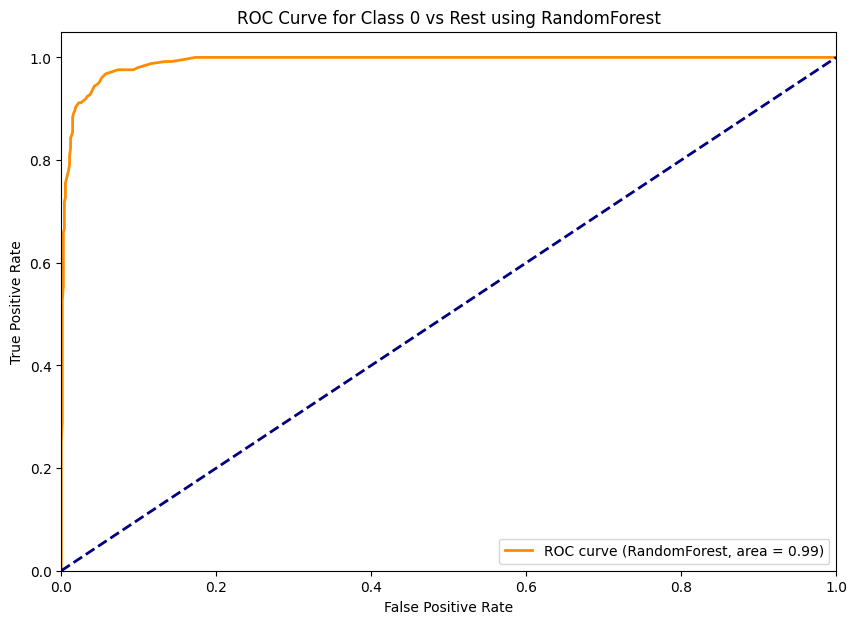

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Sample data generation for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_informative=10, n_clusters_per_class=1, random_state=42)

# Convert to binary classification: class 0 vs rest
y_binary = np.where(y == 0, 1, 0)

# Define the classifier
classifier = RandomForestClassifier(class_weight='balanced')

# Define stratified K-Folds for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the pipeline
pipeline = Pipeline([('classifier', classifier)])

# Cross-validated predictions and scores
y_pred = cross_val_predict(pipeline, X, y_binary, cv=skf, method='predict_proba')[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_binary, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (RandomForest, area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 0 vs Rest using RandomForest')
plt.legend(loc='best')
plt.show()


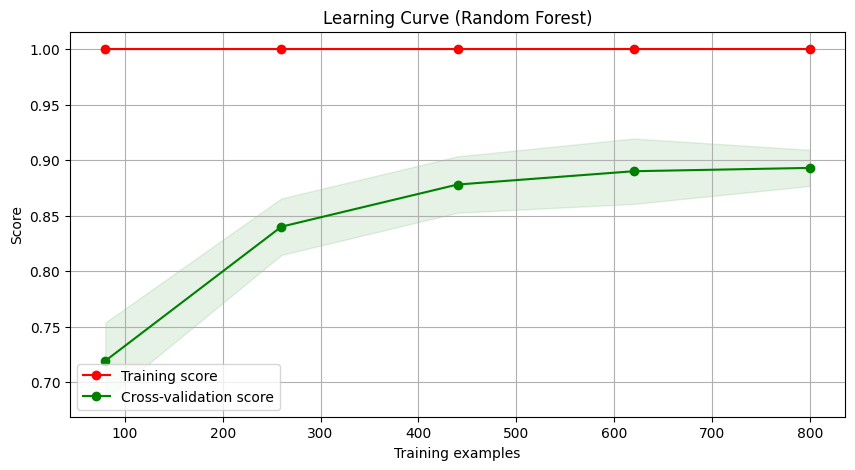

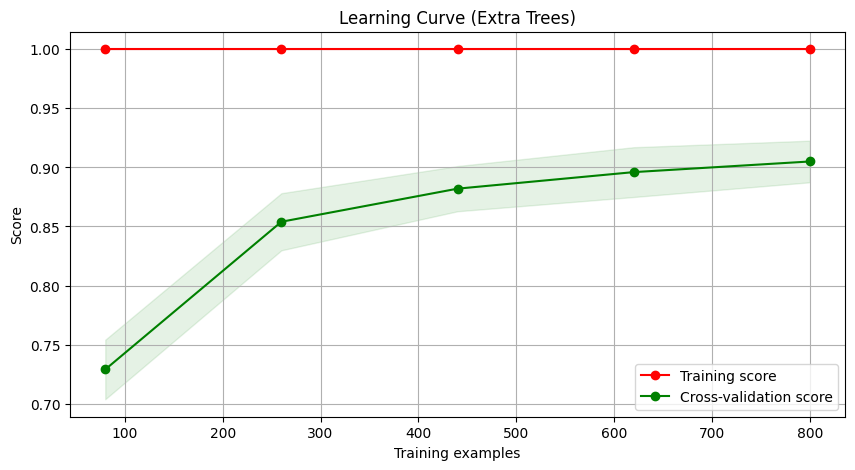

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Sample data generation for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_informative=10, n_clusters_per_class=1, random_state=42)

# List of classifiers to evaluate
classifiers = [
    ('Random Forest', RandomForestClassifier(class_weight='balanced')),
    ('Extra Trees', ExtraTreesClassifier(class_weight='balanced'))
]

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curves for each classifier
for name, clf in classifiers:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Add scaler if necessary
        ('classifier', clf)
    ])
    plot_learning_curve(pipeline, f'Learning Curve ({name})', X, y, cv=5, n_jobs=-1)


In [ ]:
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
results = results.sort_values(by='Accuracy', ascending=False)
results.head(6)

,Classifier,Accuracy,Recall,Precision,F1-Score
3,KNeighborsClassifier,0.933632,0.933632,0.941262,0.935098
4,ExtraTreesClassifier,0.919875,0.919875,0.937959,0.924100
1,RandomForestClassifier,0.919195,0.919195,0.937254,0.923471
0,DecisionTreeClassifier,0.916249,0.916249,0.940316,0.923831
2,AdaBoostClassifier,0.891291,0.891291,0.898426,0.887031
5,GaussianNB,0.793524,0.793524,0.774266,0.761888


In [ ]:
pipeline = Pipeline([
        ('classifier', ExtraTreesClassifier())
    ])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('classifier', ExtraTreesClassifier())])

In [ ]:
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114429
           1       0.96      0.99      0.97     28794
           2       0.89      0.63      0.74      2841
           3       0.95      0.74      0.83       808

    accuracy                           0.99    146872
   macro avg       0.95      0.84      0.88    146872
weighted avg       0.99      0.99      0.99    146872



In [ ]:
import joblib
joblib.dump(pipeline,'eTc.sav')

['eTc.sav']

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>MODEL RESULTS</b></h2>
</div>


In [ ]:
fig = go.Figure(data=go.Table(
    header=dict(values=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
                fill_color='black',
                font=dict(color='white'),
                align='center'),
    cells=dict(values=[results['Classifier'], results['Accuracy'], results['Precision'],
                       results['Recall'], results['F1-Score']],
               fill_color='black',
               font=dict(color='white'),
               align='center')))

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'))

fig.show()

In [ ]:
for column in results.columns:
    fig = go.Figure(data=go.Bar(
        x=results['Classifier'],
        y=results[column],
        marker=dict(color='steelblue'),
        text=results[column],
        textposition='auto'
    ))

    fig.update_layout(
        title_text=column,
        xaxis_title='Model',
        yaxis_title=column,
        plot_bgcolor='rgb(17,17,17)',
        paper_bgcolor='rgb(17,17,17)',
        font=dict(color='white')
    )


    fig.show()

In [ ]:
def get_numerical_values(url):
    url = url.replace('www.', '')
 #   url_len = get_url_length(url)
    letters_count = count_letters(url)
    digits_count  = count_digits(url)
    special_chars_count = count_special_chars(url)
    shortened = has_shortening_service(url)
    abnormal = abnormal_url(url)
    secure_https = secure_http(url)
    have_ip = have_ip_address(url)

    parsed_url  = urlparse(url)
    root_domain = parsed_url.netloc.split(".")[-1]
    url_region = get_url_region(root_domain)

    return {
  #      'url_len': url_len,
        'letters_count': letters_count,
        'digits_count': digits_count,
        'special_chars_count': special_chars_count,
        'shortened': shortened,
        'abnormal': abnormal,
        'secure_http': secure_https,
        'have_ip': have_ip,
        'url_region': hash_encode(url_region),
        'root_domain': hash_encode(root_domain)
    }

# def get_url_length(url):
#     return len(url)
def extract_pri_domain(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain
def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits
def count_special_chars(url):
    special_chars = "!@#$%^&*()_+-=[]{};:,.<>/?`~|"
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars
def has_shortening_service(url):
    pattern = re.compile(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                         r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                         r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                         r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                         r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                         r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                         r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                         r'tr\.im|link\.zip\.net')
    match = pattern.search(url)
    return int(bool(match))
def abnormal_url(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    if hostname:
        hostname = str(hostname)
        match = re.search(hostname, url)
        if match:
            return 1
    return 0
def secure_http(url):
    scheme = urlparse(url).scheme
    if scheme == 'https':
        return 1
    else:
        return 0
def have_ip_address(url):
    pattern = r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
              r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
              r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
              r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
              r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)' \
              r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|' \
              r'([0-9]+(?:\.[0-9]+){3}:[0-9]+)|' \
              r'((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)'

    match = re.search(pattern, url)
    if match:
        return 1
    else:
        return 0
def get_url_region(primary_domain):
    ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }

    for ccTLD in ccTLD_to_region:
        if primary_domain.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]

    return "Global"
def extract_root_domain(url):
    extracted = tldextract.extract(url)
    root_domain = extracted.domain
    return root_domain
def hash_encode(category):
    hash_object = hashlib.md5(category.encode())
    return int(hash_object.hexdigest(), 16) % (10 ** 8)

In [ ]:
def model_predict(url):
    class_mapping = {
        0: 'benign',
        1: 'defacement',
        2: 'phishing',
        3: 'malware'
    }
    numerical_values = get_numerical_values(url)
    prediction_int = pipeline.predict(np.array(list(numerical_values.values())).reshape(1, -1))[0]
    prediction_label = class_mapping.get(prediction_int, 'Unknown')
    return prediction_int, prediction_label


In [ ]:
url = "	https://metiamskaextension.webflow.io"
numerical_values = get_numerical_values(url)
print(numerical_values)
print(len(numerical_values))
print(list(numerical_values.values()))
print(model_predict(url)[0],model_predict(url)[1])

{'letters_count': 32, 'digits_count': 0, 'special_chars_count': 5, 'shortened': 0, 'abnormal': 1, 'secure_http': 1, 'have_ip': 0, 'url_region': 32604616, 'root_domain': 13919359}
9
[32, 0, 5, 0, 1, 1, 0, 32604616, 13919359]
0 benign


In [ ]:
url = "https://www.google.com/webhp?hl=en&sa=X&ved=0ahUKEwil-e7LmdqDAxXfzjgGHa4mBcYQPAgJ"
numerical_values = get_numerical_values(url)
print(numerical_values)
print(len(numerical_values))
print(list(numerical_values.values()))
print(model_predict(url)[0],model_predict(url)[1])

{'letters_count': 62, 'digits_count': 3, 'special_chars_count': 12, 'shortened': 0, 'abnormal': 1, 'secure_http': 1, 'have_ip': 0, 'url_region': 32604616, 'root_domain': 54754640}
9
[62, 3, 12, 0, 1, 1, 0, 32604616, 54754640]
0 benign


In [ ]:
url = "http://dappsolv.pages.dev/app/"
numerical_values = get_numerical_values(url)
print(numerical_values)
print(len(numerical_values))
print(list(numerical_values.values()))
print(model_predict(url)[0],model_predict(url)[1])

{'letters_count': 23, 'digits_count': 0, 'special_chars_count': 7, 'shortened': 0, 'abnormal': 1, 'secure_http': 0, 'have_ip': 0, 'url_region': 32604616, 'root_domain': 5749122}
9
[23, 0, 7, 0, 1, 0, 0, 32604616, 5749122]
1 defacement


In [ ]:
model_filename = 'url_classifier_model.pkl'
joblib.dump(pipeline, model_filename)

['url_classifier_model.pkl']